# Задание 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.
Интерсепт  α показывает чему будет равна зависимая переменная, если независимая равна 0.

In [69]:
# Сначала вычислим всё через формулу

from matplotlib import pyplot as plt
import numpy as np

zp = np.array([35,  45,  190, 200, 40,  70,  54,  150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

# ks = b0 + zp*b1  # найдём коэффоциенты для такой линейной регрессии

zp_mean = np.mean(zp)
ks_mean = np.mean(ks)
zp_centered = [i - zp_mean for i in zp]
ks_centered = [i - ks_mean for i in ks]

b1 = (np.mean(zp*ks) - zp_mean*ks_mean) / (np.mean(zp**2) - zp_mean**2)
b0 = ks_mean - b1*zp_mean

b0, b1

(444.1773573243596, 2.620538882402765)

Text(0, 0.5, 'Кредитный скоринг')

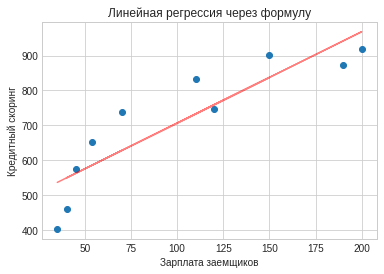

In [70]:
plt.style.use('seaborn-whitegrid')

ox = zp
oy = b0 + b1*ox

plt.scatter(zp, ks)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.title('Линейная регрессия через формулу')
plt.xlabel('Зарплата заемщиков')
plt.ylabel('Кредитный скоринг')

Минимальная точка при b1 = 5.9 (565182.86)


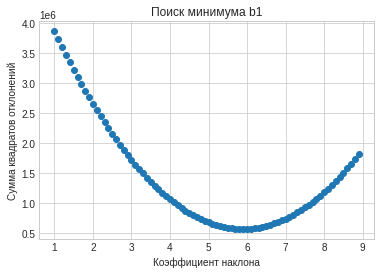

In [71]:
# Теперь вычислим методом перебора всех точек, получая
# кучу точек и делая кучу операций

# предположим, что уравнение имеет вид ks = b1*zp
b1_p = []
res = [] # сумма квадратов отклонений
min_b1_p = None
min_res = None
for b1 in range(10, 90, 1):
    b1 /= 10
    k = np.sum([(i[0] - b1*i[1])**2 for i in list(zip(ks,zp))])
    b1_p.append(b1)
    res.append(k)
    if min_res is None or k < min_res:
        min_res = k
        min_b1_p = b1

plt.scatter(b1_p, res)

plt.title('Поиск минимума b1')
plt.ylabel('Cумма квадратов отклонений')
plt.xlabel('Коэффициент наклона')

print(f'Минимальная точка при b1 = {min_b1_p} ({min_res})')

Text(0, 0.5, 'Кредитный скоринг')

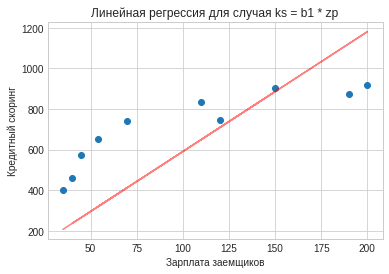

In [72]:
# построим график с линейной регрессией без интерсепта
ox = zp
oy = min_b1_p*ox

plt.scatter(zp, ks)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.title('Линейная регрессия для случая ks = b1 * zp')
plt.xlabel('Зарплата заемщиков')
plt.ylabel('Кредитный скоринг')

# Задание 2* (Дополнительно, на оценку не влияет)
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

Кол-во шагов при градиентном спуске = 41
Формула линейной регрессии: ks = 5.89*zp


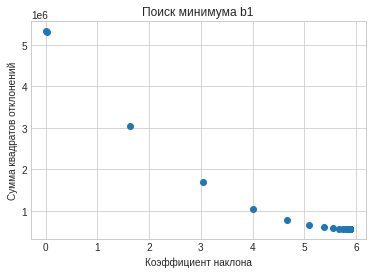

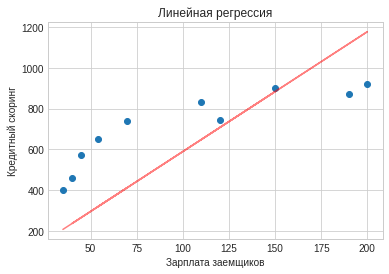

In [106]:
# предположим, что уравнение имеет вид ks = b1 * zp
# Найдём минимум, используя градиентный спуск

# координаты минимумов
min_b1 = None
min_res = None

# вспомогательные переменные (предыдущие точки на графиках)
k_prev = None
b1_prev = None

# данные для графиков
b1_plot = []
k_plot = []

# скорость "обучения" градиентного спуска
b1_eta = 0.0001

b1_counter = 1

while b1_counter < 900:
    b1 = b1_counter / 100

    k = np.sum([(i[0] - b1*i[1])**2 for i in list(zip(ks,zp))])
    if min_res is None or k < min_res:
        min_res = k
        min_b0 = b0
        min_b1 = b1

    b1_counter_step = 1 # стандартный шаг без градиента
    # вычисляем следующий шаг, используя градиент
    if b1_prev is not None and k_prev is not None:
        b1_tg = (k_prev-k) / (b1_prev-b1)  # тангенс наклона
        b1_counter_step = -b1_eta * b1_tg

        if abs(b1_tg) < 0.1:  # подошли к минимуму функции
            break

    b1_counter += b1_counter_step
    k_prev = k
    b1_prev = b1

    b1_plot.append(b1)
    k_plot.append(k)

print(f'Кол-во шагов при градиентном спуске = {len(b1_plot)}')
print(f'Формула линейной регрессии: ks = {round(min_b1, 2)}*zp')

plt.scatter(b1_plot, k_plot)
plt.title('Поиск минимума b1')
plt.ylabel('Cумма квадратов отклонений')
plt.xlabel('Коэффициент наклона')
plt.show()


ox = zp
oy = min_b1*ox

plt.scatter(zp, ks)
plt.plot(ox, oy, color='red', alpha=0.5)
plt.title('Линейная регрессия для случая ks = b1 * zp')
plt.xlabel('Зарплата заемщиков')
plt.ylabel('Кредитный скоринг')
plt.show()

# Задание 3* (Дополнительно, на оценку не влияет)
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Кол-во шагов при градиентном спуске = 1845
Формула линейной регрессии: ks = 444.15 + 2.62*zp


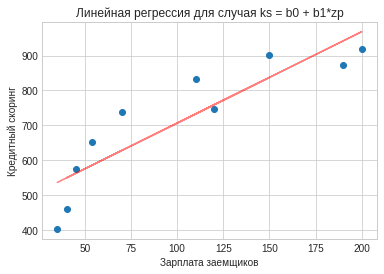

In [113]:
# предположим, что уравнение имеет вид ks = b0 + b1*zp
# Найдём минимум, используя градиентный спуск

# координаты минимумов
min_b0 = None
min_b1 = None
min_k = None
min_k_b0 = None

# вспомогательные переменные (предыдущие точки на графиках)
k_prev = None
k_b0 = None
k_b0_prev = None
b0_prev = None
b1_prev = None

# данные для графиков
b0_plot = []
b1_plot = []
k_plot = []

# скорость "обучения" градиентного спуска
b0_eta = 0.04
b1_eta = 0.0001

b0_counter = 100
while b0_counter < 800:
    
    b0 = b0_counter / 1
    b1_counter = 100
    b1_prev = None
    k_prev = None
    
    while b1_counter < 900:
        b1 = b1_counter / 100
        
        k = np.sum([(i[0] - (b0+b1*i[1]))**2 for i in list(zip(ks,zp))])
        if min_k is None or k < min_k:
            min_k = k
            min_b1 = b1
        
        b1_counter_step = 1 # стандартный шаг без градиента
        # вычисляем следующий шаг, используя градиент
        if b1_prev is not None and k_prev is not None and b1_prev-b1 != 0:
            b1_tg = (k_prev-k) / (b1_prev-b1)  # тангенс наклона
            b1_counter_step = -b1_eta * b1_tg

            if abs(b1_tg) < 0.001:  # подошли к минимуму функции с текущим b0
                k_b0 = k
                break

        b1_counter += b1_counter_step
        k_prev = k
        b1_prev = b1
        
        b1_plot.append(b1)
        k_plot.append(k)
        b0_plot.append(b0)
    
    b0_counter_step = 1
    if b0_prev is not None and k_b0_prev is not None and b0_prev-b0 != 0:
        b0_tg = (k_b0_prev-k_b0) / (b0_prev-b0)  # тангенс наклона
        b0_counter_step = -b0_eta * b0_tg
    
        if abs(b0_tg) < 0.2:  # подошли к минимуму функции
            if min_b0 is None or b0 < min_b0:
                min_b0 = b0
            break
    
    b0_counter += b0_counter_step
    k_b0_prev = k_b0
    b0_prev = b0

print(f'Кол-во шагов при градиентном спуске = {len(b1_plot)}')
print(f'Формула линейной регрессии: ks = {round(min_b0, 2)} + {round(min_b1, 2)}*zp')

ox = zp
oy = min_b0 + min_b1*ox

plt.scatter(zp, ks)
plt.plot(ox, oy, color='red', alpha=0.5)
plt.title('Линейная регрессия для случая ks = b0 + b1*zp')
plt.xlabel('Зарплата заемщиков')
plt.ylabel('Кредитный скоринг')
plt.show()

# Полученные по формуле в первом задании значения равны (444.18, 2.62)

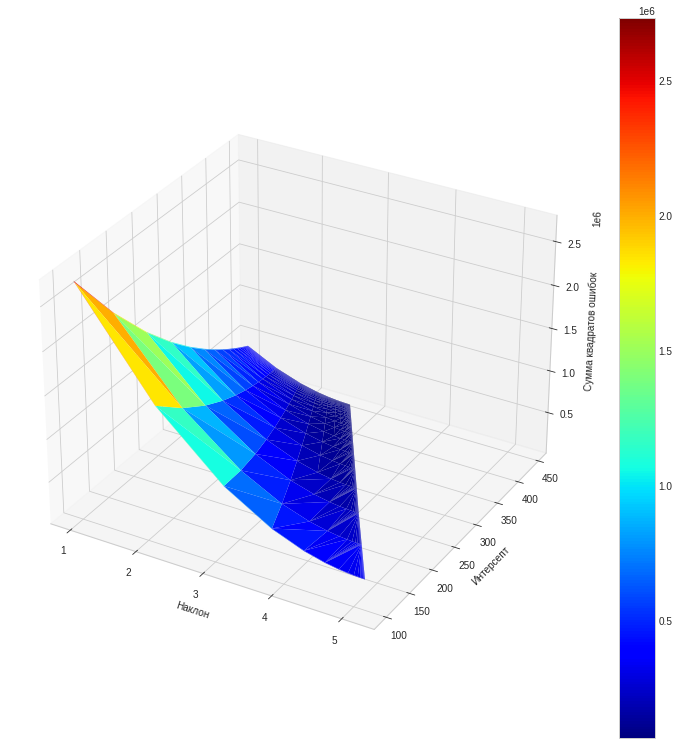

In [144]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
surf = ax.plot_trisurf(b1_plot, b0_plot, k_plot, cmap=cm.jet)
fig.colorbar(surf, shrink=0.5)
ax.set_xlabel('Наклон')
ax.set_ylabel('Интерсепт')
ax.set_zlabel('Сумма квадратов ошибок')
plt.show()